# Advent of Code 2024
## Part 1

In [4]:
def is_position_within_the_map(position, elevations):
    nrow = elevations.shape[0]
    ncol = elevations.shape[1]
    if any([position[0] < 0, position[0] >= nrow, position[1] < 0, position[1] >= ncol]):
        return False
    else:
        return True
    
def get_next_position(position, direction):
    i = position[0]
    j = position[1]
    if direction == "u":
        next_position = (i-1,j)
    elif direction == "d":
        next_position = (i+1,j)
    elif direction == "l":
        next_position = (i,j-1)
    elif direction == "r":
        next_position = (i,j+1)

    return next_position


def search_viable_trails(start, elevations, part2 = False):
    results_container = []
    paths = [[start]]

    if elevations[start] != 0:
        return 0

    for counter in range(1,10):
        for path in paths[:]:
            current_position = path[-1]
            for direction in ["u", "d", "l", "r"]:
                next_position = get_next_position(current_position, direction)
                new_path = path.copy()
                new_path.append(next_position)
                
                
                if not is_position_within_the_map(next_position, elevations):
                    continue
                elif elevations[next_position] != counter:
                    continue
                else:
                    paths.append(new_path)

        
        #counter += 1
        paths = [sublist for sublist in paths if len(sublist) >= counter+1]

        if part2: #prune the lists which match exactly
            list_of_tuples = [tuple(sublist) for sublist in paths]
            unique_tuples = set(list_of_tuples)
            paths = [list(sublist_tuple) for sublist_tuple in unique_tuples]
        else: #prune the lists which are standing on the same position
            paths = list({sublist[-1]: sublist for sublist in reversed(paths)}.values())[::-1]

    return(len(paths))





In [2]:
import numpy as np
elevations = np.genfromtxt("day10.txt", dtype = int, delimiter = 1)  
runsum = 0
for index_tuple in np.ndindex(elevations.shape):
    runsum += search_viable_trails(start = index_tuple, elevations = elevations)
print(runsum)


489


## Part 2

In [7]:
import numpy as np
elevations = np.genfromtxt("day10.txt", dtype = int, delimiter = 1)  
runsum = 0
for index_tuple in np.ndindex(elevations.shape):
    runsum += search_viable_trails(start = index_tuple, elevations = elevations, part2 = True)
print(runsum)


1086


### Plots of elevation

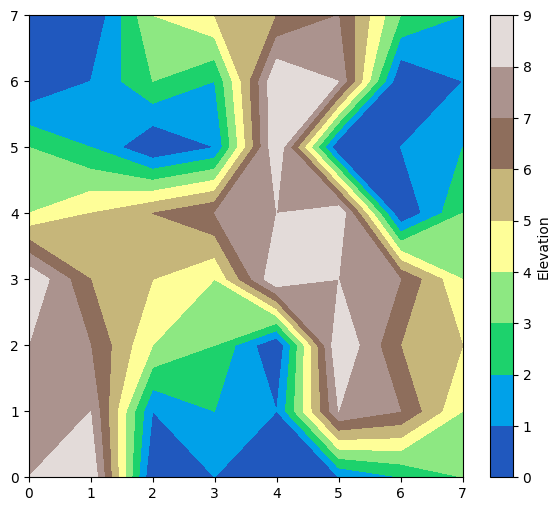

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))

# Plot the filled contours
# Matplotlib assumes X and Y coordinates are indices (0-7) if not provided
cp = plt.contourf(elevations, cmap='terrain', levels=10) # 10 levels of elevation

# Add a color bar
plt.colorbar(cp, label='Elevation')

# Add simple contour lines on top (optional)
#plt.contour(elevations, colors='black', linewidths=0.5, levels=cp.levels)


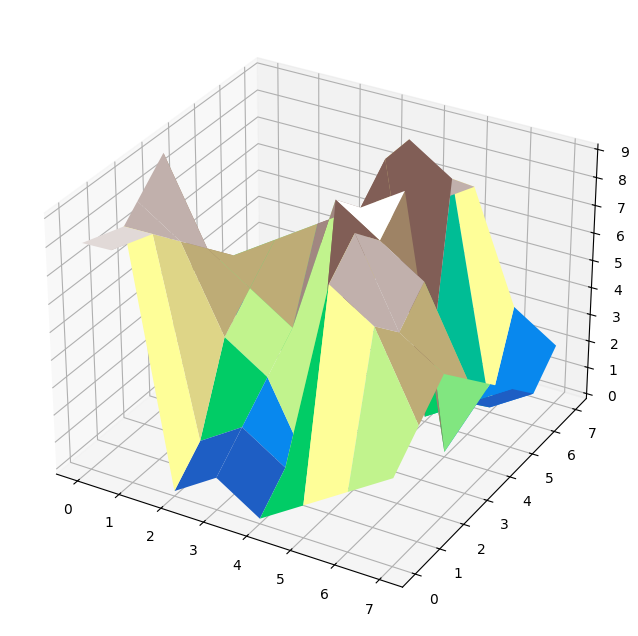

In [12]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(8)
y = np.arange(8)
X, Y = np.meshgrid(x, y)

# Plot the surface
surf = ax.plot_surface(X, Y, elevations, cmap='terrain', edgecolor='none')